In [3]:
import os
import sys
import fasttext
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neattext.functions as nfx
import requests
import time
from tqdm import tqdm

current_directory = os.getcwd()
root_directory = os.path.abspath(os.path.join(current_directory, '..', '..')) 
if root_directory not in sys.path:
   sys.path.append(root_directory)

import logging
logging.basicConfig(level=logging.CRITICAL)

from code_utils.utils import aplatir 

In [4]:
climat_topics=['T10753', 'T11988', 'T10122', 'T10139', 'T10577', 'T11862', 'T13377', 'T10898', 'T12981', 'T10174', 'T11405', 'T13396', 'T12213', 'T12639', 'T11056', 'T11880', 'T11753', 'T10439', 'T10766', 'T10438', 'T12806', 'T11244', 'T11186', 'T10029', 'T11588', 'T10075', 'T10017', 'T10644', 'T10895', 'T10266', 'T10230', 'T11320', 'T10341', 'T10005', 'T10347', 'T10765', 'T10032', 'T11333', 'T10226', 'T10466', 'T10647', 'T11483', 'T10330', 'T10471', 'T10199', 'T10555', 'T11259', 'T11594', 'T10643', 'T10319', 'T10487', 'T10435', 'T10659', 'T10089','T10255', 'T11088', 'T10930', 'T12073', 'T11459', 'T11061', 'T10302', 'T10190', 'T10779', 'T10535', 'T12617', 'T12414', 'T10166', 'T10004', 'T10889', 'T11913', 'T10398', 'T11760']


In [5]:
climat_topics_str=['climate change','marine ecosystems','ecology','ecological','environmental','methane emission','ocean acidification','arctic sea ice','environmental impact','climate ethics','hydrological cycle','energy transition','influence of climate','urban heat islands','mitigation strategies','impact on climate','environmental policies','carbon dioxide capture','carbon dioxide storage','soil carbon dynamics','sustainable development','environmental governance','atmospheric aerosols','marine biogeochemistry','biodiversity','global flood risk','arctic sea ice','ocean surface waves and wind interaction','aeolian geomorphology','wind erosion dynamics','coastal protection','water resource management','air pollution','deforestation','energy efficiency','global drought','landslide hazards','paleoclimat',"climate resilience", "climate adaptation", "carbon footprint", "carbon neutrality", "climate mitigation", "climate models", "climate scenarios", "zero emissions", "renewable energy", "sustainable agriculture", "ecosystem services", "climate vulnerability", "climate impacts", "climate policy", "global warming", "low-carbon", "climate change adaptation strategies", "ecosystem-based adaptation", "climate finance", "fossil fuel phase-out", "carbon trading", "climate-induced displacement", "environmental resilience", "greenhouse gas emissions", "land-use change", "climate risk assessment", "climate-induced migration", "carbon sequestration", "bioenergy", "energy transition pathways", "climate justice", "climate-sensitive diseases", "adaptation planning", "geoengineering", "flood management", "ecosystem restoration", "heat stress", "mitigation", "carbon pricing", "sustainable forestry", "blue carbon", "adaptation and resilience building","green infrastructure", "climate", "urban adaptation strategies", "climate-smart agriculture", "drought mitigation", "weather extremes", "ocean conservation", "green energy" "floodplain management", "temperature rise mitigation"]
#climat_topics_str=['climate change','marine ecosystems','ecology','ecological','environmental','methane emission','ocean acidification','arctic sea ice','environmental impact','climate ethics','hydrological cycle','energy transition','influence of climate','urban heat islands','mitigation strategies','impact on climate','environmental policies','carbon dioxide capture','carbon dioxide storage','soil carbon dynamics','sustainable development','environmental governance','atmospheric aerosols','marine biogeochemistry','biodiversity','global flood risk','arctic sea ice','ocean surface waves','aeolian geomorphology','wind erosion','coastal protection','water resource management','air pollution','deforestation','energy efficiency','global drought','landslide hazards','paleoclimat',"climate resilience", "climate adaptation", "carbon footprint", "carbon neutrality", "climate mitigation", "climate science","climate models", "climate scenarios", "zero emissions", "renewable energy", "sustainable agriculture", "ecosystem services", "climate vulnerability", "climate impacts", "climate policy", "global warming", "low-carbon", "climate changeadaptation strategies", "ecosystem-based adaptation", "climate finance", "fossil fuel phase-out", "carbon trading", "climate-induced displacement", "environmental resilience", "greenhouse gas emissions", "land-use change", "climate risk assessment", "climate-induced migration", "carbon sequestration", "bioenergy", "energy transition", "climate justice", "climate-sensitive diseases", "adaptation planning", "geoengineering", "flood management", "ecosystem restoration", "heat stress", "mitigation", "carbon pricing", "sustainable forestry", "blue carbon", "resilience building","green infrastructure", "climate", "adaptation", "smart agriculture", "drought mitigation", "weather extremes", "ocean conservation", "green energy" "floodplain management", "temperature rise mitigation"]
climat_topics_str=['"'+str(x)+'"' for x in climat_topics_str if str(x).find(' ')>=0]+[str(x) for x in climat_topics_str if str(x).find(' ')==-1]

In [6]:
climat_topics_OR=('|').join(climat_topics)
climat_topics_OR_str=(' OR ').join(climat_topics_str)

In [7]:
climat_topics_OR_str

'"climate change" OR "marine ecosystems" OR "methane emission" OR "ocean acidification" OR "arctic sea ice" OR "environmental impact" OR "climate ethics" OR "hydrological cycle" OR "energy transition" OR "influence of climate" OR "urban heat islands" OR "mitigation strategies" OR "impact on climate" OR "environmental policies" OR "carbon dioxide capture" OR "carbon dioxide storage" OR "soil carbon dynamics" OR "sustainable development" OR "environmental governance" OR "atmospheric aerosols" OR "marine biogeochemistry" OR "global flood risk" OR "arctic sea ice" OR "ocean surface waves and wind interaction" OR "aeolian geomorphology" OR "wind erosion dynamics" OR "coastal protection" OR "water resource management" OR "air pollution" OR "energy efficiency" OR "global drought" OR "landslide hazards" OR "climate resilience" OR "climate adaptation" OR "carbon footprint" OR "carbon neutrality" OR "climate mitigation" OR "climate models" OR "climate scenarios" OR "zero emissions" OR "renewable

In [8]:
climat_topics_OR

'T10753|T11988|T10122|T10139|T10577|T11862|T13377|T10898|T12981|T10174|T11405|T13396|T12213|T12639|T11056|T11880|T11753|T10439|T10766|T10438|T12806|T11244|T11186|T10029|T11588|T10075|T10017|T10644|T10895|T10266|T10230|T11320|T10341|T10005|T10347|T10765|T10032|T11333|T10226|T10466|T10647|T11483|T10330|T10471|T10199|T10555|T11259|T11594|T10643|T10319|T10487|T10435|T10659|T10089|T10255|T11088|T10930|T12073|T11459|T11061|T10302|T10190|T10779|T10535|T12617|T12414|T10166|T10004|T10889|T11913|T10398|T11760'

In [9]:
url=f"https://api.openalex.org/works?filter=has_doi:true,publication_year:{2022},topics.id:{climat_topics_OR},title_and_abstract.search:({climat_topics_OR_str})&group-by=institutions.country_code"
response = requests.get(url)
data = response.json()

In [10]:
data

{'meta': {'count': 163698,
  'db_response_time_ms': 1850,
  'page': 1,
  'per_page': 200,
  'groups_count': 200},
 'group_by': [{'key': 'https://openalex.org/countries/CN',
   'key_display_name': 'China',
   'count': 33503},
  {'key': 'https://openalex.org/countries/US',
   'key_display_name': 'United States of America',
   'count': 30515},
  {'key': 'https://openalex.org/countries/GB',
   'key_display_name': 'United Kingdom of Great Britain and Northern Ireland',
   'count': 13183},
  {'key': 'https://openalex.org/countries/DE',
   'key_display_name': 'Germany',
   'count': 11322},
  {'key': 'https://openalex.org/countries/AU',
   'key_display_name': 'Australia',
   'count': 7027},
  {'key': 'https://openalex.org/countries/CA',
   'key_display_name': 'Canada',
   'count': 6787},
  {'key': 'https://openalex.org/countries/FR',
   'key_display_name': 'France',
   'count': 6714},
  {'key': 'https://openalex.org/countries/IN',
   'key_display_name': 'India',
   'count': 6713},
  {'key': 'h

In [11]:
dict_countries=[]

for year in range(2013,2024,1):
    url=f"https://api.openalex.org/works?filter=has_doi:true,publication_year:{year},topics.id:{climat_topics_OR},title_and_abstract.search:({climat_topics_OR_str})&group-by=institutions.country_code"
    response = requests.get(url)
    data = response.json()
    for i in range(0,15,1):
        dict_countries.append({"year":str(year),'country':data['group_by'][i]['key'].replace('https://openalex.org/countries/',''),'count':data['group_by'][i]['count'],'total':data['meta']['count'], 'rank': i+1})

In [12]:
df=pd.DataFrame(dict_countries)
df['percentage']=df.apply(lambda row: round(row['count']*100/row['total'],1),axis=1)

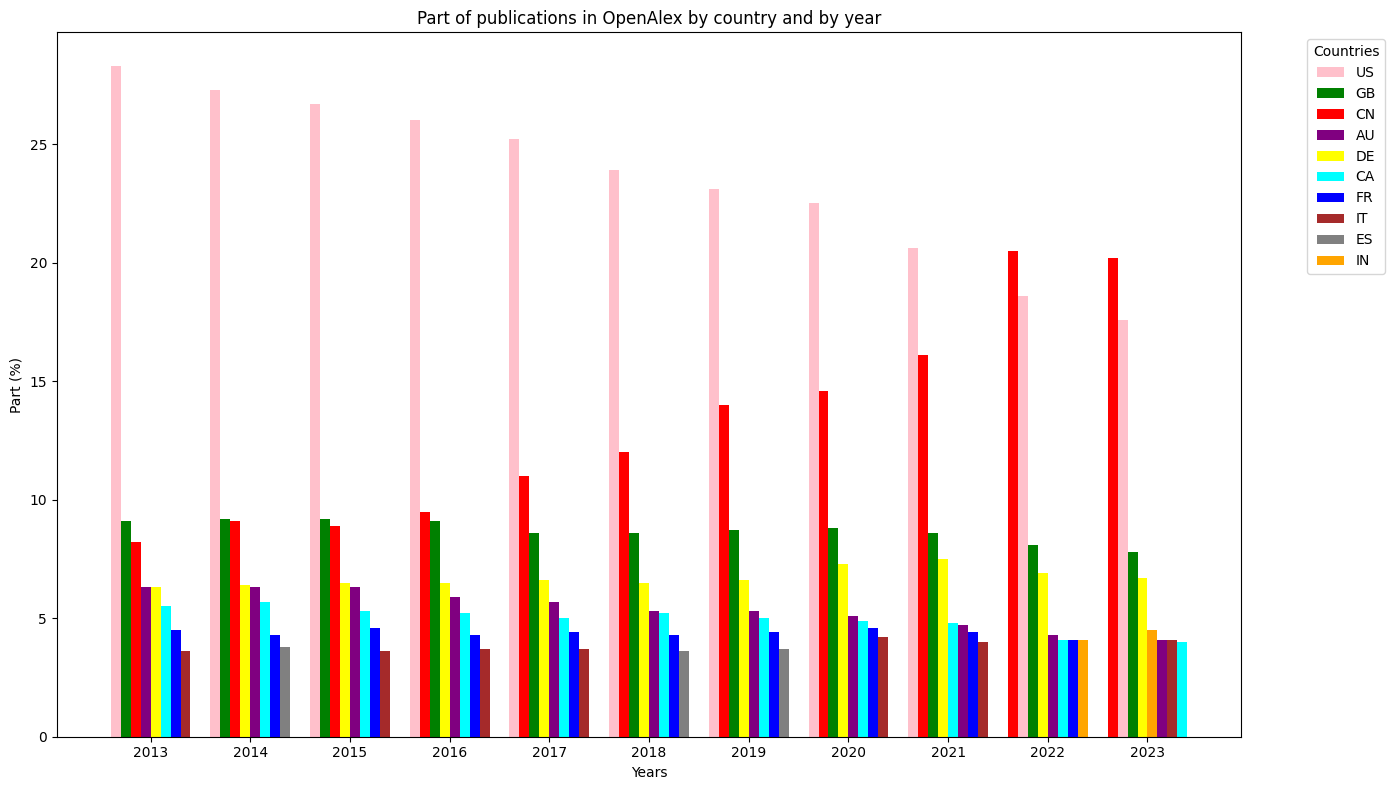

In [13]:
years = df['year'].unique()

color_dict = {
    'US': 'pink',
    'GB': 'green',
    'CN': 'red',
    'DE': 'yellow',
    'AU': 'purple',
    'CA': 'cyan',
    'FR': 'blue',
    'IN': 'orange',
    'IT': 'brown'
}

bar_width = 0.1
index = np.arange(len(years)) 
fig, ax = plt.subplots(figsize=(14, 8))

used_countries = set() 
for i, year in enumerate(years):
    year_data = df[df['year'] == year]
    
    top_8_countries = year_data.nlargest(8, 'count')['country']
    year_data_top_8 = year_data[year_data['country'].isin(top_8_countries)]
    
    for j, country in enumerate(top_8_countries):
        country_data = year_data_top_8[year_data_top_8['country'] == country]
        
        color = color_dict.get(country, 'gray')
        
        bar = ax.bar(index[i] + j * bar_width, country_data['percentage'], bar_width, label=country if country not in used_countries else "", color=color)
        
        if country not in used_countries:
            used_countries.add(country)

ax.set_xlabel('Years')
ax.set_ylabel('Part (%)')
ax.set_title('Part of publications in OpenAlex by country and by year')
ax.set_xticks(index + bar_width * 3.5)
ax.set_xticklabels(years)
ax.legend(title="Countries", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

with Highcharts

In [ ]:
# pip install virtualenv
# virtualenv -p python3.10 myenv
# myenv\Scripts\activate
# pip install highcharts_core

In [1]:
from highcharts_core.chart import Chart
from highcharts_core.options import HighchartsOptions
from highcharts_core.options.plot_options import PlotOptions
from highcharts_core.options.axes.x_axis import XAxis
from highcharts_core.options.axes.y_axis import YAxis,YAxisTitle
from highcharts_core.options.axes.accessibility import AxisAccessibility
from highcharts_core.options.axes.title import AxisTitle
from highcharts_core.options.title import Title
from highcharts_core.options.subtitle import Subtitle
from highcharts_core.options.legend import Legend
from highcharts_core.options.plot_options.series import SeriesOptions
from highcharts_core.options.series.area import LineSeries
from highcharts_core.options.series.labels import SeriesLabel
from highcharts_core.options.responsive import Responsive, ResponsiveRules, Condition
from highcharts_core.constants import EnforcedNull
from highcharts_core.options.credits import Credits

In [35]:
chart_options = HighchartsOptions(
    chart={
        'width': 800,  
        'height': 600  
    },
    title = Title(text = 'Part of publications in OpenAlex for 7 countries by year', #Part of publications in OpenAlex for 10 countries by year
                  align = 'left',                                                    #Rank for 10 countries by year in OpenAlex publications
                  style={'fontSize': '40px'}),                                                 
    subtitle = Subtitle(text = 'Source: <a href="https://irecusa.org/programs/solar-jobs-census/" target="_blank">OpenAlex</a>',
                        align = 'left'),
    y_axis = YAxis(title = YAxisTitle(text = 'Part', style={'fontSize': '20px'}), style={'fontSize': '30px'}, min=1, labels={'style': {'fontSize': '20px'}}), #reversed=True
    x_axis = XAxis(title = AxisTitle(text = 'Year', style={'fontSize': '20px'}),
                   labels={'style': {'fontSize': '20px'}},
        accessibility = AxisAccessibility(range_description = 'Range: 2013 to 2023')),
    legend = Legend(layout = 'vertical',
                    align = 'right',
                    vertical_align = 'middle'),
    plot_options = PlotOptions(series = SeriesOptions(point_start = 2013,
                                                      label = SeriesLabel(connector_allowed = False,
                                                                          style={'fontSize': '20px'}))),
    credits = Credits(enabled=False),
    exporting={
        'enabled': False  
    }
)

In [36]:
override_options = HighchartsOptions(legend = Legend(layout = 'horizontal',
                                                     align = 'center',
                                                     vertical_align = 'bottom'))
responsive_config = Responsive(
    rules = [
        ResponsiveRules(chart_options = override_options,
                        condition = Condition(max_width = 500))
    ]
)
chart_options.responsive = responsive_config

In [38]:
series1 = LineSeries(name = 'US',
                     data = list(df[df.country=='US']['percentage']))
series2 = LineSeries(name = 'GB',
                     data = list(df[df.country=='GB']['percentage']),
                    color = 'green')
series3 = LineSeries(name = 'CN',
                     data = list(df[df.country=='CN']['percentage']),
                     color = 'red')
series4 = LineSeries(name = 'DE',
                     data = list(df[df.country=='DE']['percentage']),
                     color= 'purple')
series5 = LineSeries(name = 'FR',
                     data = list(df[df.country=='FR']['percentage']),
                     color = 'blue')
series6 = LineSeries(name = 'IN',
                     data = list(df[df.country=='IN']['percentage']),
                     color = 'orange')
series9 = LineSeries(name = 'IT',
                     data = list(df[df.country=='IT']['percentage']),
                     color = 'green')
""" series7 = LineSeries(name = 'AU',
                     data = list(df[df.country=='AU']['rank']),
                     color = 'grey')
series8 = LineSeries(name = 'CA',
                     data = list(df[df.country=='CA']['rank']),
                     color = 'brown')
series9 = LineSeries(name = 'IT',
                     data = list(df[df.country=='IT']['rank']),
                     color = 'green')
series10 = LineSeries(name = 'ES',
                     data = list(df[df.country=='ES']['rank']),
                     color = 'yellow') """

chart_options.add_series(series1, series2, series3, series4, series5, series6, series9) #series7,series8,series9,series10)

In [39]:
chart = Chart.from_options(chart_options)
chart.display()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2nd ipcc model on openAlex publications 

In [ ]:
data_OA=[]
countries=['US','GB','CN','DE','FR']
for country in countries:
    print(country)
    url=f"https://api.openalex.org/works?filter=has_doi:true,publication_year:2022,topics.id:{climat_topics_OR},title_and_abstract.search:({climat_topics_OR_str}),institutions.country_code:{country}&select=doi,title,topics,locations&per_page=200&page=1"
    response = requests.get(url)
    data = response.json()
    if data['meta']['count']//data['meta']['per_page']==0:
        nb_page=data['meta']['count']//data['meta']['per_page']+1
    else:
        nb_page=data['meta']['count']//data['meta']['per_page']+2
    print(nb_page)
    cursor='*'
    for j in tqdm(range(1, nb_page), desc=f"Processing pages for {country}", leave=False):
        if j % 500 and j!=1:
            time.sleep(60)
        url=f"https://api.openalex.org/works?filter=has_doi:true,publication_year:2022,topics.id:{climat_topics_OR},title_and_abstract.search:({climat_topics_OR_str}),institutions.country_code:{country}&select=doi,title,topics,locations&per_page=200&cursor={cursor}"
        response = requests.get(url)
        data = response.json()
        cursor=data['meta']['next_cursor']
        for i in range(len(data['results'])):
            if 'results' in list(data.keys()):
                doi=data['results'][i]['doi']
                title=data['results'][i]['title']
                topics=[topic.get('display_name') for topic in data['results'][i]['topics'] if 'display_name' in list(topic.keys())]
                locations_names=list(pd.Series([location['source'].get('display_name',None) for location in data['results'][i]['locations'] if pd.isna(location['source'])==False]).drop_duplicates().dropna())
                locations_ids=list(pd.Series([location['source'].get('issn_l',None) for location in data['results'][i]['locations'] if pd.isna(location['source'])==False]).drop_duplicates().dropna())
                data_OA.append({'doi':doi, 'title':title, 'topics':topics, 'locations_names':locations_names, 'locations_ids': locations_ids, 'countries':country})

In [ ]:
data['meta']

In [ ]:
pd.DataFrame(data_OA)

In [ ]:
pd.DataFrame(data_OA).to_json('data_OA_2020.json',orient='records',lines=True)


utilisation du model_wg

In [7]:
df=pd.read_json('data_OA.json',orient='records',lines=True)

In [8]:
path=os.path.join(root_directory, 'notebooks', 'models_fasttext_or_random_forest','fasttext_model_teds_wg.bin')

In [9]:
model = fasttext.load_model(path)

In [10]:
df.loc[:,'doi']=df.loc[:,'doi'].apply(lambda x: str(nfx.remove_stopwords(x)).replace('https://doi.org/','').lower())    

In [11]:
df.loc[:,'title']=df.loc[:,'title'].apply(lambda x: str(nfx.remove_stopwords(str(x))).replace('}','').replace('{','').lower())

In [12]:
df.loc[:,'topics']=df.loc[:,'topics'].apply(lambda x: nfx.remove_stopwords(' '.join(x)).lower())

In [13]:
df.loc[:,'locations_names']=df.loc[:,'locations_names'].apply(lambda x: str(nfx.remove_stopwords(' '.join(x))).lower().replace('journals','').replace('journal','').replace('letters','').replace('letter',''))

In [14]:
df.loc[:,'locations_ids']=df.loc[:,'locations_ids'].apply(lambda x: ' '.join(x))

In [15]:
df

,doi,title,topics,locations_names,locations_ids,countries
0,10.1038/s41467-022-28283-y,robust weak winter atmospheric circulation res...,arctic antarctic ice dynamics climate variabil...,nature communications hal (le centre pour la c...,2041-1723,US
1,10.1073/pnas.2108146119,climate endgame: exploring catastrophic climat...,climate change health impacts ecosystem dynami...,proceedings national academy sciences publicat...,0027-8424,US
2,10.1016/s0140-6736(22)01540-9,2022 report lancet countdown health climate ch...,climate change health impacts global health ca...,lancet greenwich academic literature archive (...,0140-6736,US
3,10.1029/2020rg000726,global regional trends drivers fire climate ch...,fire effects ecosystems plant water relations ...,reviews geophysics cronfa (swansea university)...,1944-9208,US
4,10.1016/j.oneear.2022.09.002,ocean conservation boosts climate change mitig...,coral marine ecosystems studies coastal marine...,earth hal (le centre pour la communication sci...,2590-3322,US
...,...,...,...,...,...,...
95525,10.5194/epsc2022-592,numerical modeling thermal wave layered icy su...,planetary science exploration marine environme...,,,FR
95526,10.5194/egusphere-plinius17-81,combined high-resolution rain/wind measurement...,tropical extratropical cyclones research preci...,,,FR
95527,10.7554/elife.76182.sa1,decision letter: integration host factor regul...,insect pesticide research plant animal studies...,,,FR
95528,10.5194/epsc2022-246,exploring laboratory impact low energy oxygen ...,astro planetary science atmospheric ozone clim...,hal (le centre pour la communication scientifi...,,FR


In [16]:
df.loc[:,'prediction']=df.apply(lambda row: model.predict(nfx.remove_stopwords(f"{row['title']} {row['topics']} {row['locations_names']} {row['locations_ids']}".lower()), k=-1),axis=1)

In [17]:
df.loc[:,'predict']=df.loc[:,'prediction'].apply(lambda x: [str(list(x[0])[i]).replace('__label__','') for i in range(3) if list(x[1])[i]>=0.5])

In [18]:
df=df[df.predict.apply(lambda x: len(x)!=0)]

In [19]:
df[df.countries=='FR'].predict.value_counts()

predict
[adaptation]                4486
[science]                    892
[mitigation]                 533
[adaptation, science]        187
[science, adaptation]        137
[adaptation, mitigation]     111
[mitigation, adaptation]      89
[science, mitigation]         10
[mitigation, science]          9
Name: count, dtype: int64

In [20]:
df.loc[:,'wg']=df.loc[:,'predict'].apply(lambda x: 'multi_WG' if len(x)>1 else x[0])

C:\Users\haallat\AppData\Local\Temp\ipykernel_24128\3008372888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'wg']=df.loc[:,'predict'].apply(lambda x: 'multi_WG' if len(x)>1 else x[0])


In [25]:
len(df[df.countries=='FR'])

6454

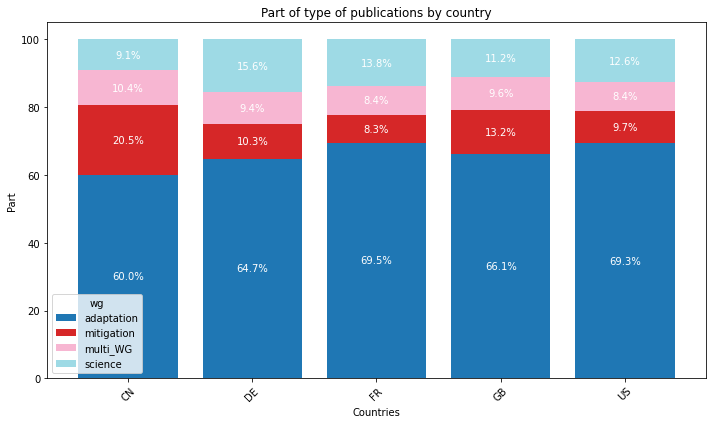

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df_percentages = df.groupby(['countries', 'wg']).size().unstack(fill_value=0)
df_percentages = df_percentages.div(df_percentages.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(10, 6))
df_percentages.plot(kind='bar', stacked=True, ax=ax, colormap='tab20', width=0.8)

for p in ax.patches:
    height = p.get_height()
    if height > 0: 
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.), 
                    ha='center', va='center', color='white', fontsize=10)

plt.title('Part of type of publications by country')
plt.ylabel('Part')
plt.xlabel('Countries')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


C:\Users\haallat\AppData\Local\Temp\ipykernel_24128\2179976965.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, size=20)
C:\Users\haallat\AppData\Local\Temp\ipykernel_24128\2179976965.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=20)


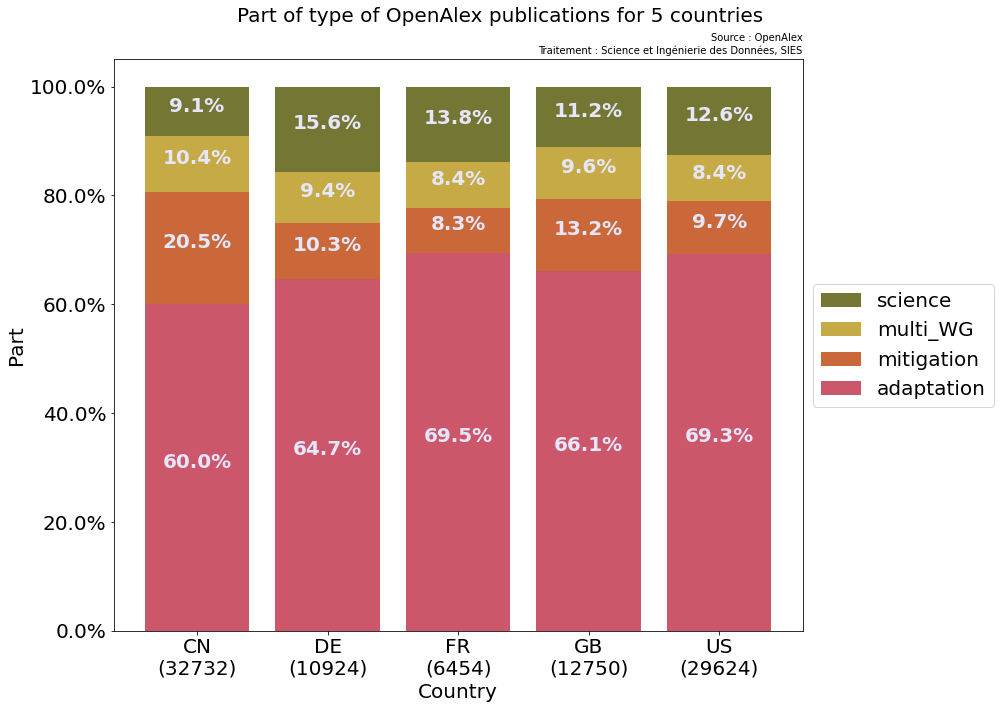

In [29]:
import matplotlib.pyplot as plt
import numpy as np

list_colors=["#cc566a",
"#cb6839",
"#c5aa46",
"#747734",
"#62b055",
"#4bb2ac",
"#7377cc",
"#be5dae"]

df_percentages = df.groupby(['countries', 'wg']).size().unstack(fill_value=0)
df_percentages = df_percentages.div(df_percentages.sum(axis=1), axis=0) * 100

countries = df_percentages.index
predict_categories = df_percentages.columns
values_array = df_percentages.values
totals = {'US':len(df[df.countries=='US']),'GB':len(df[df.countries=='GB']),'DE':len(df[df.countries=='DE']),'FR':len(df[df.countries=='FR']),'CN':len(df[df.countries=='CN'])}

fig, ax = plt.subplots(figsize=(14, 10))

for i in range(values_array.shape[1]):
    ax.bar(countries, values_array[:, i], bottom=np.sum(values_array[:, :i], axis=1), 
           color=list_colors[i], label=predict_categories[i])

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() / 2 + bar.get_y(),
            f'{bar.get_height():.1f}%', ha='center',
            color='lavender', weight='bold', size=20)

plt.suptitle("Part of type of OpenAlex publications for 5 countries", size=20)
plt.title('Source : OpenAlex\nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

x_labels = [f"{countries[i]}\n({totals[countries[i]]})" for i in range(len(countries))]
ax.set_xticklabels(x_labels, size=20)
ax.set_xlabel('Country', fontsize=20)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], fontsize=20, loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=20)
ax.set_ylabel('Part', fontsize=20)

plt.tight_layout()
plt.show()
